# **Data Understanding**

Dataset yang digunakan merupakan dataset publik yang diperoleh dari [Kaggle](https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance/data) yang sering digunakan dalam pembelajaran machine learning, terutama untuk studi kasus regresi dan klasifikasi. Dataset ini berisi informasi mengenai berbagai kebiasaan belajar dan gaya hidup mahasiswa serta skor ujian akhir mereka. Tujuan dari penggunaan dataset ini adalah untuk menganalisis potensi hubungan antara kebiasaan-kebiasaan tersebut dengan kinerja akademik mahasiswa. Dataset memiliki jumlah sampel 1000 baris. Terdapat fitur non-numerik yakni student_id, gender, part_time_job, diet_quality, parental_education_level, internet_quality, dan extracurricular_participation. Sedangkan beberapa fitur numerik yaitu age, study_hours_per_day, social_media_hours, netflix_hours, attendance_percentage, sleep_hours, exercise_frequency, mental_health_rating, dan exam_score.

**Berikut penjelasan lebih detail tentang variabel pada Dataset Student Habits vs Academic Performance:**
- student_id: kode unik atau identifikasi untuk setiap mahasiswa. Variabel ini bersifat nominal dan digunakan untuk membedakan antar individu.
- age: usia mahasiswa dalam format bilangan bulat.
- gender: Menunjukkan jenis kelamin mahasiswa, yang dikategorikan sebagai laki-laki, perempuan atau other.
- study_hours_per_day: jumlah jam yang dihabiskan mahasiswa untuk belajar dalam sehari, dalam format bilangan desimal. Variabel ini bersifat numerik (rasio) dan merupakan indikator langsung dari alokasi waktu untuk kegiatan akademik.
- social_media_hours: jumlah jam yang dihabiskan mahasiswa untuk menggunakan media sosial dalam sehari, dalam format bilangan desimal. Variabel ini bersifat numerik (rasio) dan dapat menjadi indikator potensi distraksi digital.
- netflix_hours: jumlah jam yang dihabiskan mahasiswa untuk menonton Netflix dalam sehari, dalam format bilangan desimal. Variabel ini bersifat numerik (rasio) dan juga merupakan indikator potensi distraksi digital dari hiburan visual.
- part_time_job: menunjukkan apakah mahasiswa memiliki pekerjaan paruh waktu (Ya/Tidak).
- attendance_percentage: menyajikan persentase kehadiran mahasiswa di kelas, dalam format bilangan desimal. Variabel ini bersifat numerik (rasio) dan merupakan indikator keterlibatan mahasiswa dalam proses pembelajaran formal.
- sleep_hours: jumlah jam tidur mahasiswa dalam sehari, dalam format bilangan desimal. Variabel ini bersifat numerik (rasio) dan merupakan indikator penting dari istirahat dan pemulihan fisik serta mental.
- diet_quality: mengkategorikan kualitas diet mahasiswa (misalnya, Baik, Sedang, Buruk). Variabel ini bersifat ordinal dan dapat dianalisis hubungannya dengan energi dan fungsi kognitif yang mendukung pembelajaran.
- exercise_frequency: menunjukkan seberapa sering mahasiswa berolahraga (mungkin dalam skala atau jumlah per minggu). Variabel ini bersifat numerik (interval atau rasio, tergantung pada detail skala) dan dapat menjadi indikator kesehatan fisik dan mental yang memengaruhi kinerja akademik.
- parental_education_level: Menyajikan tingkat pendidikan tertinggi orang tua mahasiswa (misalnya, SMA, S1, S2, dll.). Variabel ini bersifat ordinal dan dapat menjadi indikator latar belakang sosio-ekonomi dan dukungan pendidikan di rumah.
- internet_quality: Mengkategorikan kualitas koneksi internet yang dimiliki mahasiswa (misalnya, Baik, Sedang, Buruk). Variabel ini bersifat ordinal dan dapat memengaruhi akses ke sumber belajar daring.
-	mental_health_rating: penilaian subjektif mahasiswa terhadap kondisi kesehatan mental mereka dalam skala tertentu (1 hingga 10). Variabel ini bersifat numerik (interval) dan merupakan indikator kesejahteraan psikologis.
-	extracurricular_participation: menunjukkan apakah mahasiswa berpartisipasi dalam kegiatan ekstrakurikuler (Ya/Tidak).
- exam_score: skor akhir ujian mahasiswa, dalam format bilangan desimal. Variabel ini bersifat numerik (rasio) dan menjadi variabel target utama yang akan dianalisis dalam kaitannya dengan variabel-variabel lainnya.


## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## **Data Loading**

In [ ]:
df = pd.read_csv("/content/student_habits_performance.csv")
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


**Insight:**

*   Dataset memiliki 1000 jumlah baris dan 16 kolom fitur




## **Exploratory Data Analysis (EDA)**

### Exploratory Data Analysis - Deskripsi Variabel

In [ ]:
# Memeriksa tipe data tiap kolom fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

*   Terdapat 7 kolom bertipe object yaitu student_id, gender, part_time_job, diet_quality, parental_education_level, internet_quality dan extracurricular_participation
*   Terdapat 3 kolom bertipe interger yaitu age, exercise_frequency, dan mental_health_rating
*   Terdapat 6 kolom bertipe float64 yaitu study_hours_per_day, social_media_hours, netflix_hours, attendace_percentage, sleep_hours, dan exam_score



In [ ]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


**Insights:**
*  Study Hours vs Entertainment (socmed and netflix hours) </br>
  Rata-rata waktu belajar adalah 3,5 jam per hari tetapi waktu rata-rata bermain sosial media 2,5 jam dan netflix 1,82 jam. Apabila waktu bermain socmed dan netflix dijumlahkan maka lebih banyak waktu yang digunakan untuk hiburan daripada belajar
*  Sleep hours </br>
  Rata-rata tidur 6,47 jam dengan standar deviasi 1,23 menyiratkan bahwa ada individu yang lebih sedikit atau lebih banyak tidur dari rata-rata sehingga bisa memengaruhi energi dan fokus saat belajar
*  Exercise frequency </br>
  Olahraga rata-rata 3x dalam 1minggu, menunjukkan sebagian mahasiswa aktif berolahraga tetapi ada yang mungkin kurang memperhatikan kegiatan fisik
*  Attendance vs Exam score </br>
  Rata-rata kehadiran adalah 84,135 tetapi nilai ujian 69,60. Perlu ditelusuri alasan lain penyebab nilai ujian cenderung rendah
*  Mental health rating </br>
  Rata-rata kesehatan mental mahasiswa adalah 5,44 dari 10 dengan standar deviasi 2,85 menunjukkan variasi yang cukup besar. Perlu ditelusuri lebih lanjut faktor eksternal lainnya (seperti pola hidup dan kebiasaan mahasiswa)




### Exploratory Data Analysis - Menangani Missing Values dan Memeriksa Outlier

In [ ]:
# Menghitung jumlah nilai kosong pada setiap fitur
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


**Insight:**
*   Terdapat 91 nilai kosong pada fitur parental_education_level. Perlu ditangani dengan nilai modus

In [ ]:
# Memeriksa ada tidaknya duplikasi data
print("Jumlah duplikasi:", df.duplicated().sum())

Jumlah duplikasi: 0


In [ ]:
'''
Mengisi nilai yang kosong dengan nilai modus dalam kolom fitur parental_education_level karena merupakan fitur kategorikal
'''

df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

In [ ]:
# Cek kembali jumlah nilai kosong pada setiap fitur
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


**Insight:**
* Setelah dilakukan penanganan missing values dengan nilai modus dari fitur parental_education_level, missing values menjadi tidak terdapat pada seluruh kolom fitur

In [ ]:
# Mendefinisikan fitur numerikal dan kategorikal
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns = [col for col in categorical_columns]
categorical_columns.remove('student_id')

In [ ]:
# Menampilkan tiap fitur pada kolom numerikal dan kategorikal
print(numerical_columns)
print(categorical_columns)

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')
['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']


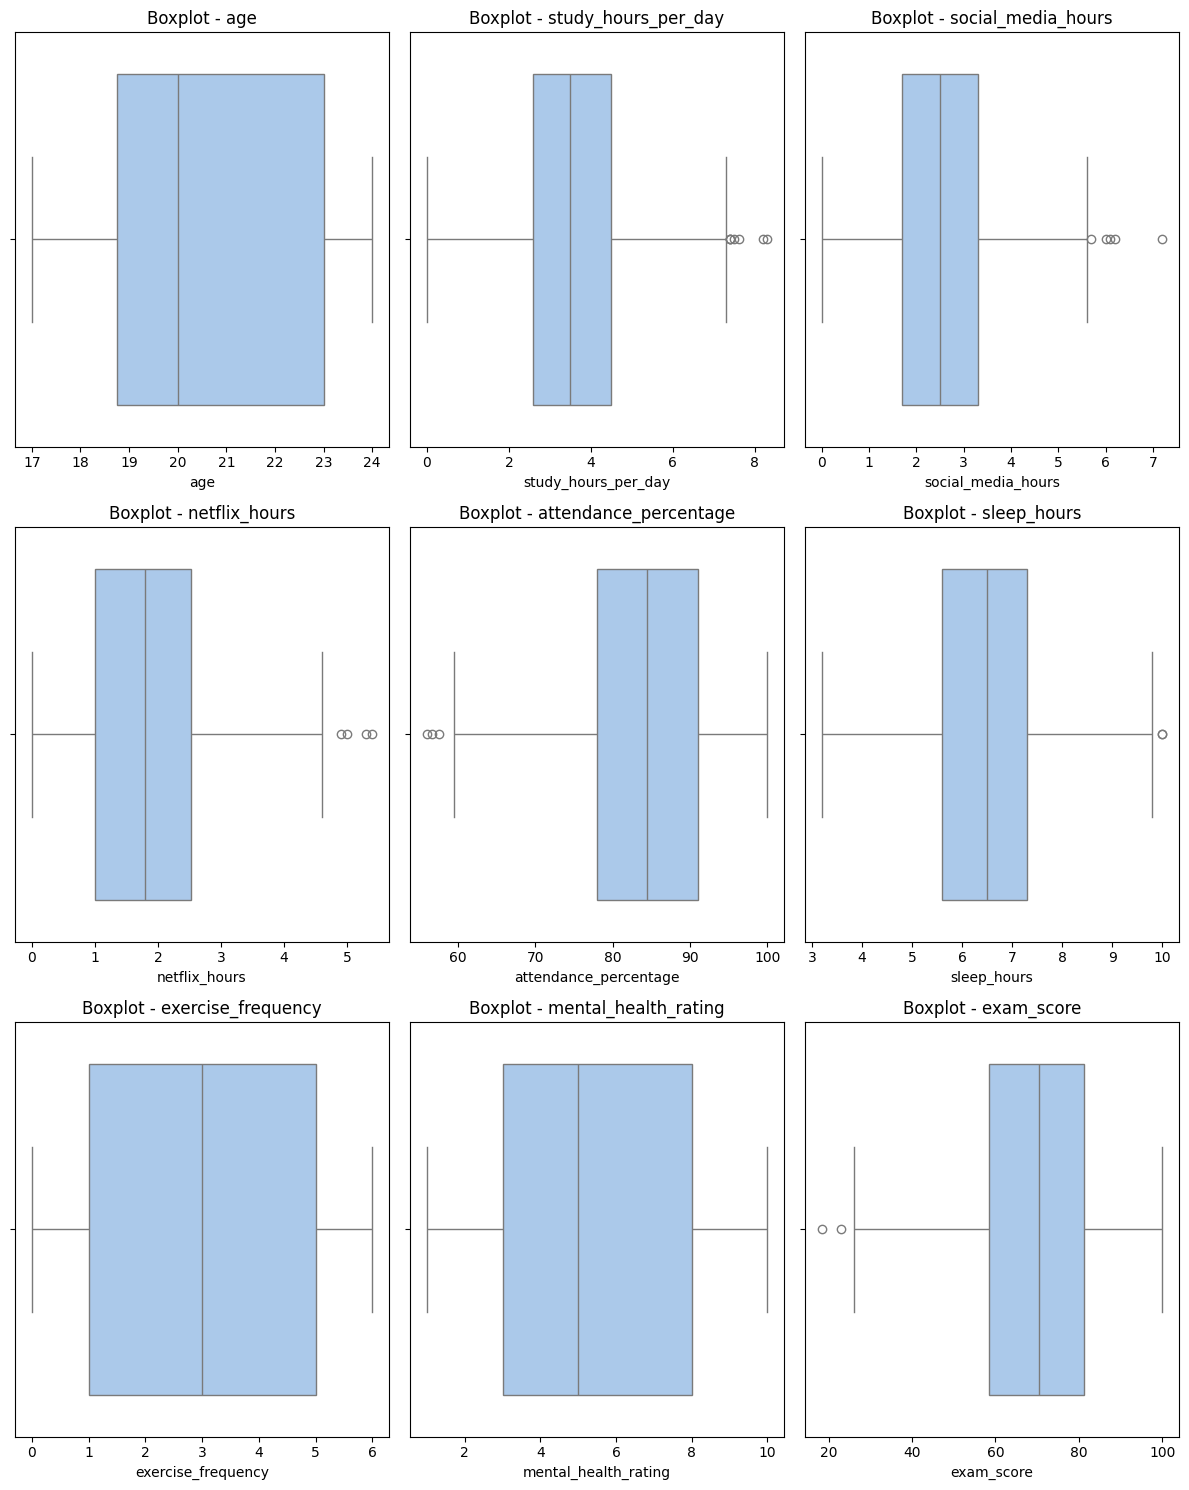

In [ ]:
'''
Mendeteksi outlier
'''

# Menentukan jumlah fitur numerik
num_cols = len(numerical_columns)
num_rows = math.ceil(num_cols / 3)  # Hitung jumlah baris berdasarkan jumlah kolom

# Membuat subplot dengan maksimal 3 per baris
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, 5*num_rows))

# Mengatur palet warna
sns.set_palette("pastel")

# Loop untuk setiap kolom numerik
for i, col in enumerate(numerical_columns):
    row_idx = i // 3  # Baris yang sesuai
    col_idx = i % 3   # Posisi kolom dalam baris

    sns.boxplot(x=df[col], ax=axes[row_idx, col_idx])  # Menggunakan x agar mendatar
    axes[row_idx, col_idx].set_title(f'Boxplot - {col}')

# Hapus subplot kosong jika jumlah kolom tidak kelipatan 3
for i in range(len(numerical_columns), num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

### Exploratory Data Analysis - Univariate Analysis

        Jumlah sampel  Persentase
gender                           
Female            481        48.1
Male              477        47.7
Other              42         4.2


<Axes: title={'center': 'gender'}, xlabel='gender'>

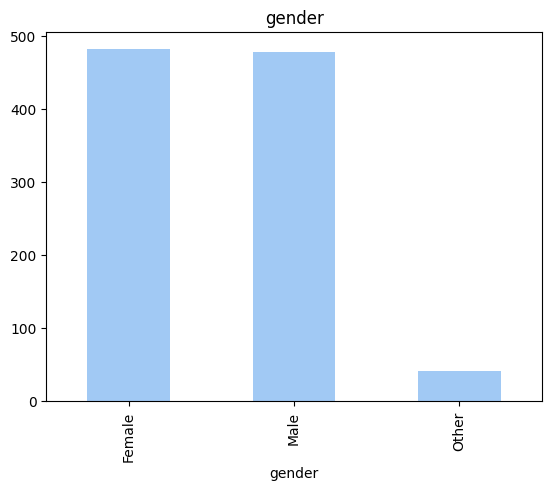

In [ ]:
feature = categorical_columns[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_gender = pd.DataFrame({"Jumlah sampel":count, "Persentase":percent.round(1)})
print(df_gender)
count.plot(kind='bar', title=feature)

               Jumlah sampel  Persentase
part_time_job                           
No                       785        78.5
Yes                      215        21.5


<Axes: title={'center': 'part_time_job'}, xlabel='part_time_job'>

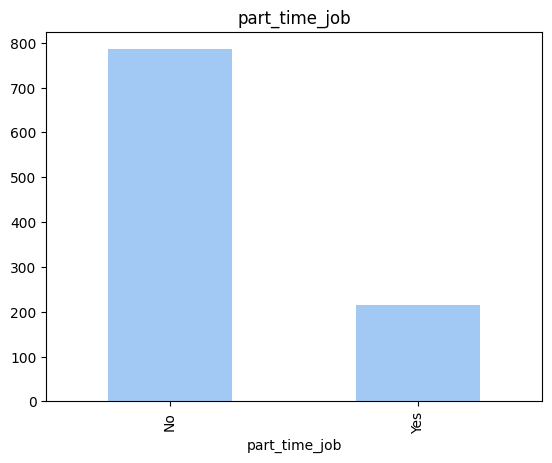

In [ ]:
feature = categorical_columns[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_gender = pd.DataFrame({"Jumlah sampel":count, "Persentase":percent.round(1)})
print(df_gender)
count.plot(kind='bar', title=feature)

              Jumlah sampel  Persentase
diet_quality                           
Fair                    437        43.7
Good                    378        37.8
Poor                    185        18.5


<Axes: title={'center': 'diet_quality'}, xlabel='diet_quality'>

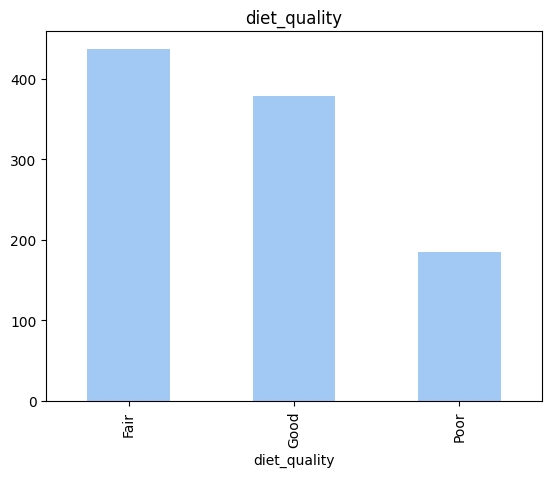

In [ ]:
feature = categorical_columns[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_gender = pd.DataFrame({"Jumlah sampel":count, "Persentase":percent.round(1)})
print(df_gender)
count.plot(kind='bar', title=feature)

                          Jumlah sampel  Persentase
parental_education_level                           
High School                         483        48.3
Bachelor                            350        35.0
Master                              167        16.7


<Axes: title={'center': 'parental_education_level'}, xlabel='parental_education_level'>

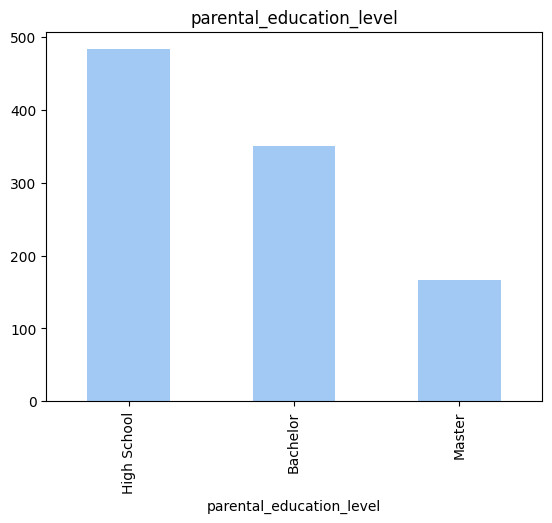

In [ ]:
feature = categorical_columns[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_gender = pd.DataFrame({"Jumlah sampel":count, "Persentase":percent.round(1)})
print(df_gender)
count.plot(kind='bar', title=feature)

                  Jumlah sampel  Persentase
internet_quality                           
Good                        447        44.7
Average                     391        39.1
Poor                        162        16.2


<Axes: title={'center': 'internet_quality'}, xlabel='internet_quality'>

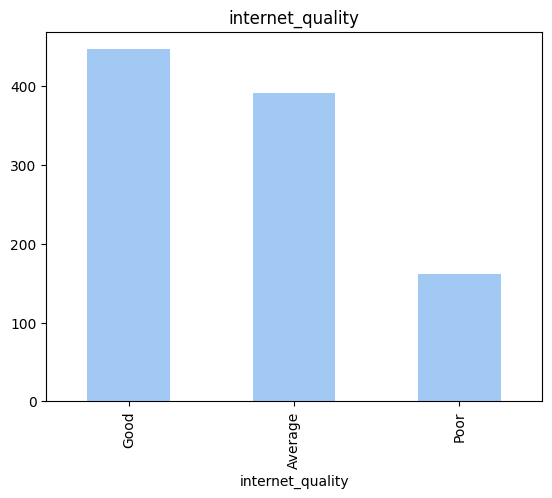

In [ ]:
feature = categorical_columns[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_gender = pd.DataFrame({"Jumlah sampel":count, "Persentase":percent.round(1)})
print(df_gender)
count.plot(kind='bar', title=feature)

                               Jumlah sampel  Persentase
extracurricular_participation                           
No                                       682        68.2
Yes                                      318        31.8


<Axes: title={'center': 'extracurricular_participation'}, xlabel='extracurricular_participation'>

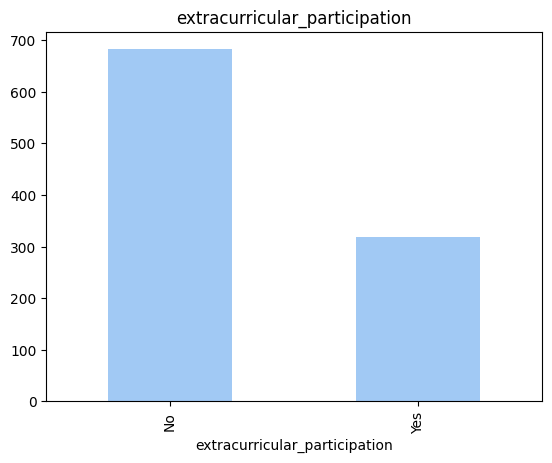

In [ ]:
feature = categorical_columns[5]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_gender = pd.DataFrame({"Jumlah sampel":count, "Persentase":percent.round(1)})
print(df_gender)
count.plot(kind='bar', title=feature)

Numerical Features

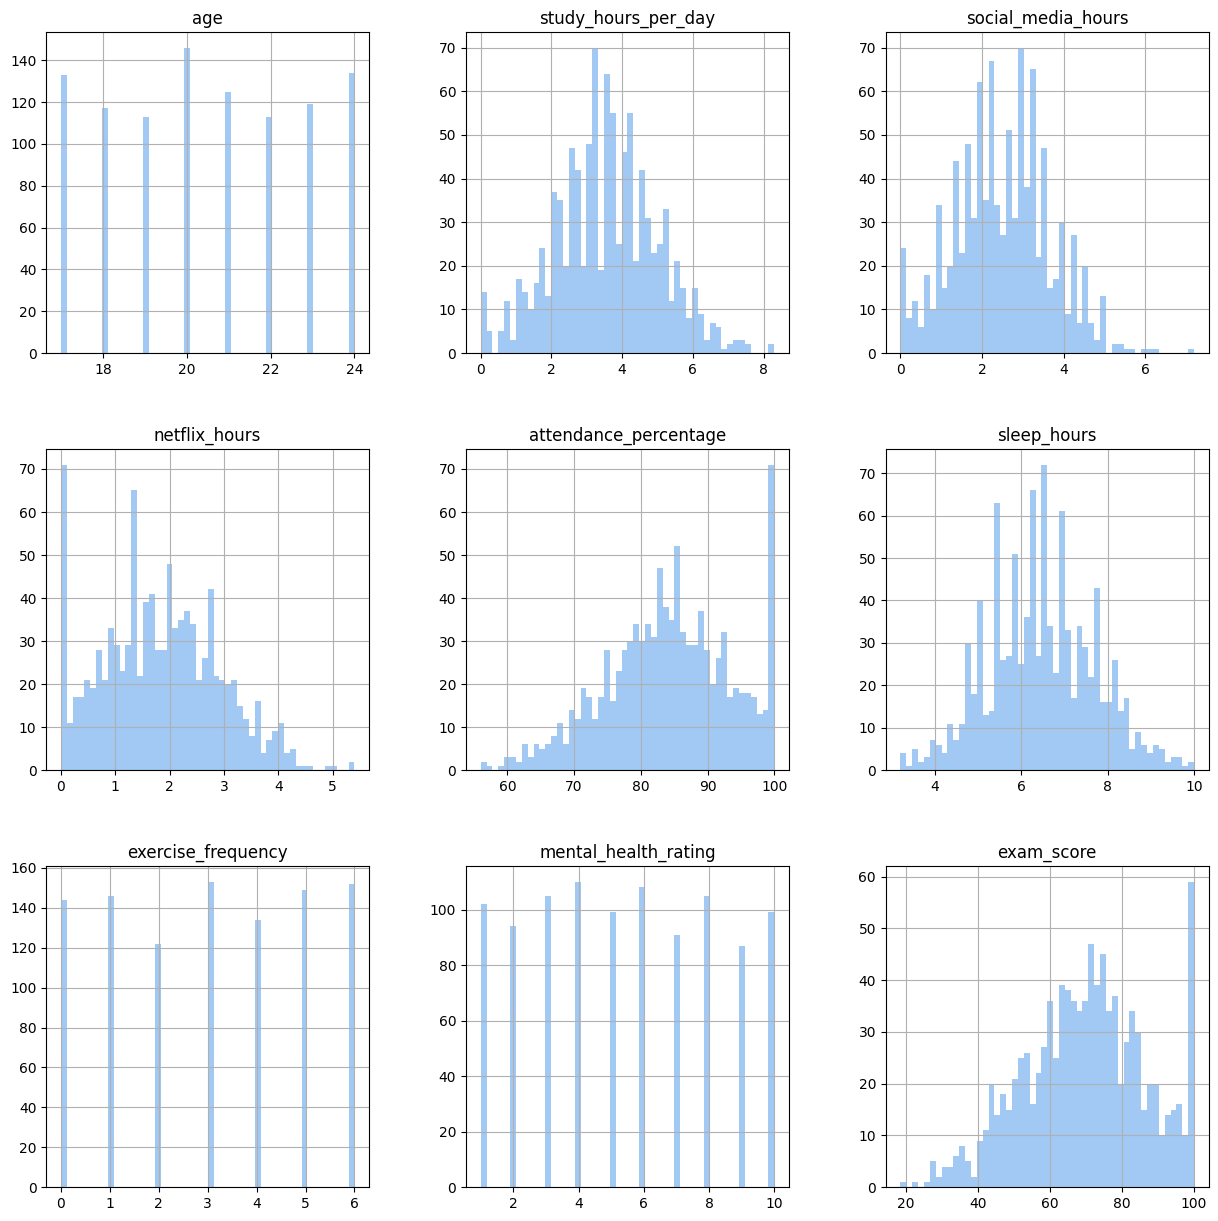

In [ ]:
df.hist(bins=50, figsize=(15,15))
plt.show()

### Exploratory Data Analysis - Multivariate Analysis Fitur Kategorikal

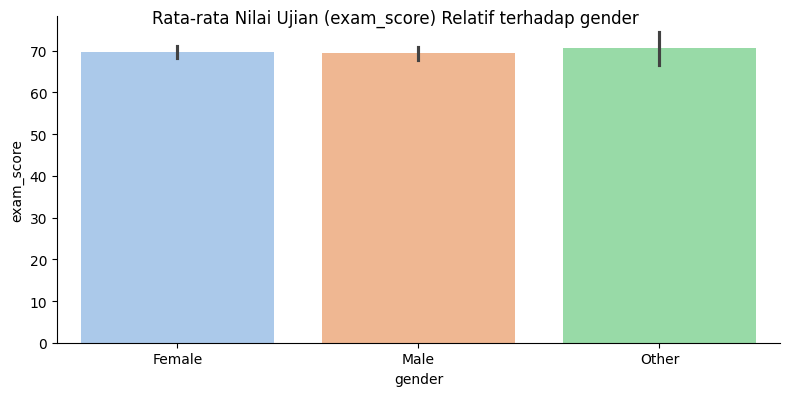

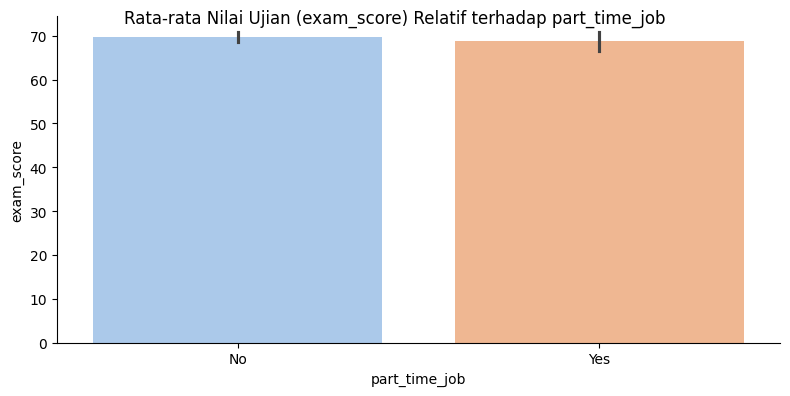

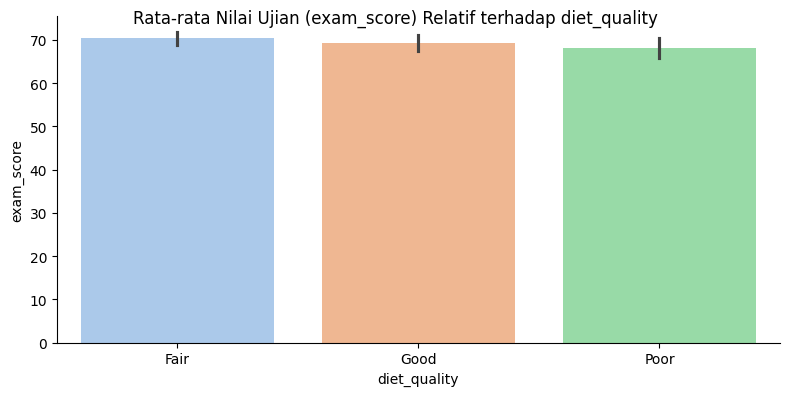

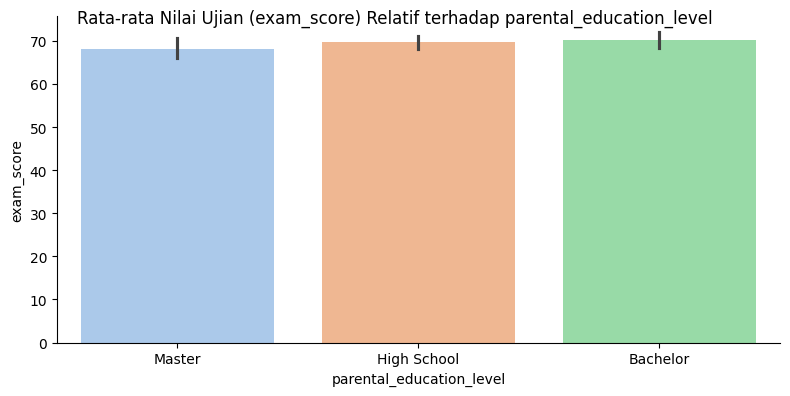

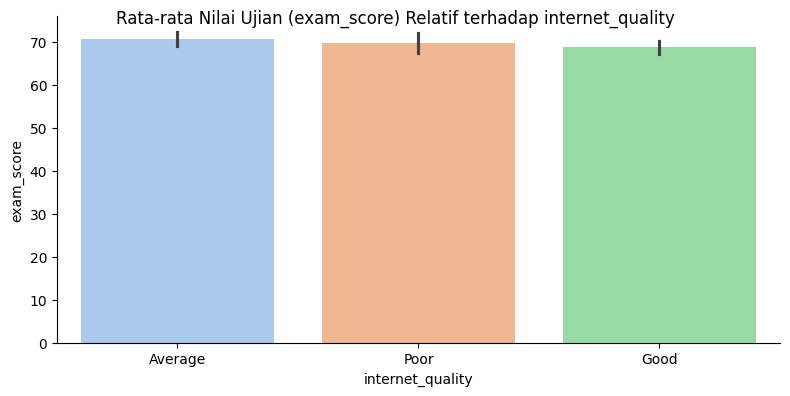

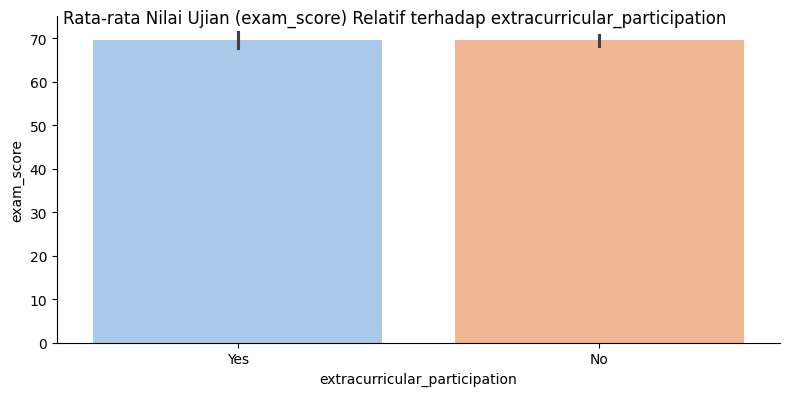

In [ ]:
# Melihat rata-rata nilai ujian (exam_score) terhadap fitur kolom kategori
for column in categorical_columns:
    g = sns.catplot(data=df, x=column, y="exam_score", kind="bar", hue=column, legend=False, dodge=False, height=4, aspect=2, palette="pastel")
    g.fig.suptitle(f"Rata-rata Nilai Ujian (exam_score) Relatif terhadap {column}")
    plt.show()

**Insight:**
* Pada fitur gender, tidak ada perbedaan signifikan dalam rata-rata nilai ujian terhadap gender (Female, Male, dan Other) karena hampir seluruh gender memiliki rata-rata nilai ujian mendekati 70. Perbedaan kecil ini menunjukkan bahwa gender bukanlah faktor yang menentukan performa akademik (exam_score)
* Meskipun terdapat perbedaan pada kategori fitur part_time_job, gap antara kedua kategori (Yes/No) tidak terlampau besar sehingga bekerja paruh waktu tidak secara langsung menyebabkan nilai ujian menjadi turun drastis. Fenomena ini menunjukkan bahwa beberapa siswa mampu mengelola waktu dengan baik antara bekerja dan belajar sehingga tetap dapat mempertahankan performa akademik (exam_score). Namun dapat ditelusuri lebih lanjut apakah mahasiswa yang bekerja cenderung berasal dari latar belakang pendidikan keluarga tertentu?
* Fitur diet_quality memiliki korelasi dengan performa akademik (exam_score), tetapi pola makan yang sangat baik (Good) tidak selalu menghasilkan nilai ujian tertinggi. Pola makan yang seimbang dan fleksibel (Fair) cenderung lebih optimal dibandingkan yang terlalu ketat atau buruk (Poor). Namun dapat ditelusuri lebih lanjut melalui cek korelasi antara diet_quality dengan mental_health_rating (apakah mahasiswa dengan pola makan "Good" juga memiliki kesehatan mental yang lebih baik?), sleep_hours (apakah mahasiswa dengan pola makan "Poor" juga mengalami gangguan tidur?), dan/atau study_hours_per_day (apakah mahasiswa dengan pola makan "Good" memiliki waktu belajar lebih optimal dibandingkan "Fair" dan "Poor"?)
* Pada fitur parental_education_level, Master memiliki rata-rata exam score paling rendah dibandingkan High School dan Bachelor. Fenomena ini menunjukkan bahwa tingkat pendidikan orang tua tidak selalu berbanding lurus dengan performa akademik anak (exam_score). Tetapi perlu ditelusuri lebih lanjut penyebabnya melalui cek hubungan antara parental_education_level dengan mental_health_rating (apakah siswa dengan orang tua berpendidikan tinggi lebih banyak mengalami stress akademik?), study_hours_per_day (apakah siswa dengan orang tua berpendidikan Master lebih banyak belajar atau justru kurang belajar dibandingkan High School dan Bachelor?), dan/atau sleep_hours (Apakah siswa kurang tidur sehingga performa akademik menurun?)
* Pada fitur internet_quality, rata-rata nilai ujian (exam_score) tidak memiliki perbedaan signifikan berdasarkan kualitas internet (internet_quality), karena semua kategori —Average, Poor, dan Good— memiliki nilai ujian yang hampir sama, sekitar 70. Hal ini menunjukkan bahwa dalam dataset ini, internet quality tampaknya bukan faktor utama yang memengaruhi performa akademik
* Untuk fitur extracurricular_participation, tidak ada perbedaan signifikan dalam nilai ujian (exam_score) antara mahasiswa yang mengikuti ekstrakurikuler dan yang tidak. Peristiwa ini menunjukkan bahwa partisipasi dalam kegiatan tambahan di luar akademik (ekstrakurikuler) mungkin bukan faktor utama yang memengaruhi performa akademik







#### Analisis Lanjutan Hasil Fitur Kolom Kategorikal yang diperoleh dari Multivariate Analysis

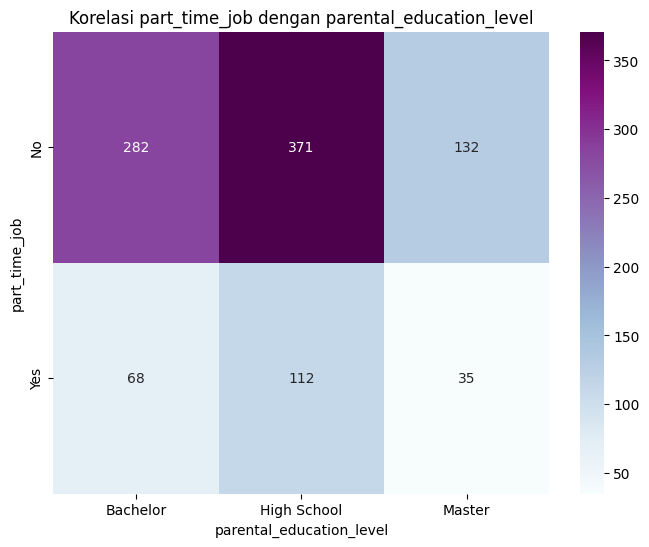

In [ ]:
# Cek hubungan antara part time job dan parental education level
category_matrix = pd.crosstab(df['part_time_job'], df['parental_education_level'])

plt.figure(figsize=(8, 6))
sns.heatmap(category_matrix, annot=True, cmap="BuPu", fmt="d")

plt.title("Korelasi part_time_job dengan parental_education_level")
plt.show()

**Insight:** </br>
Parental_education_level memiliki korelasi dengan status part_time_job mahasiswa. Semakin tinggi parental_education_level, semakin kecil kemungkinan mahasiswa bekerja part_time_job. DIbuktikan pada kategori Yes (High School=112 > Bachelor=68 > Master=35).

<ipython-input-346-c007d4c69000>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['diet_quality'], y=df['mental_health_rating'], palette="pastel")


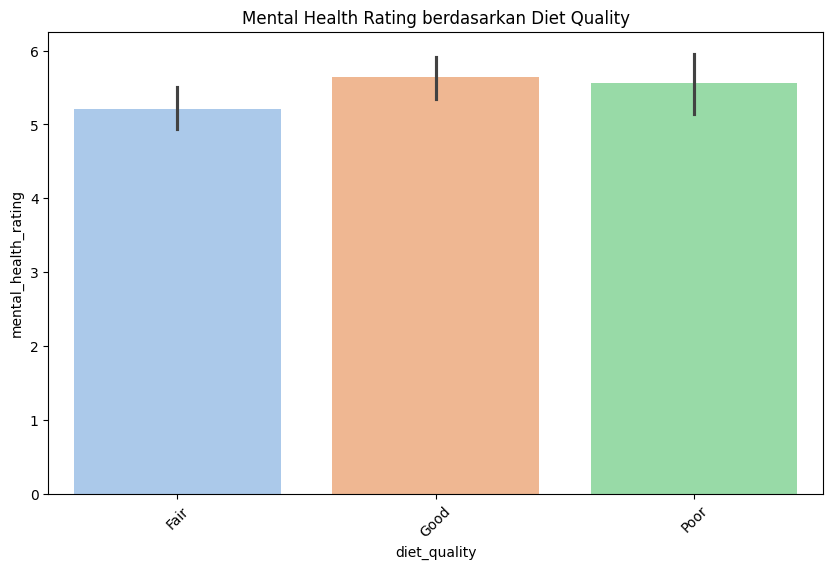

In [ ]:
# Cek hubungan antara diet_quality dan mental_health_rating
plt.figure(figsize=(10, 6))
sns.barplot(x=df['diet_quality'], y=df['mental_health_rating'], palette="pastel")

plt.title("Mental Health Rating berdasarkan Diet Quality")
plt.xticks(rotation=45)
plt.show()

**Insight:**
Mahasiswa dengan pola makan "Good" memang berhubungan dengan mental_health_rating lebih baik, tetapi pola makan "Poor" tidak selalu menyebabkan mental_health_rating rendah. Fenomena ini berdasarkan barplot di atas bahwa pola makan "Poor" masih dapat menjaga kesehatan mentalnya dengan cukup baik daripada yang memiliki pola makan "Fair". Oleh karena itu, perlu ditelusuri lebih lanjut apakah pemicu stabilnya kesehatan mental untuk mahasiswa yang memiliki pola makan "Poor" karena terlibat dalam kegiatan ekstrakurikuler atau sering berolahraga?.


<ipython-input-347-4143e3a3f89f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['diet_quality'], y=df['extracurricular_participation'], palette="pastel")


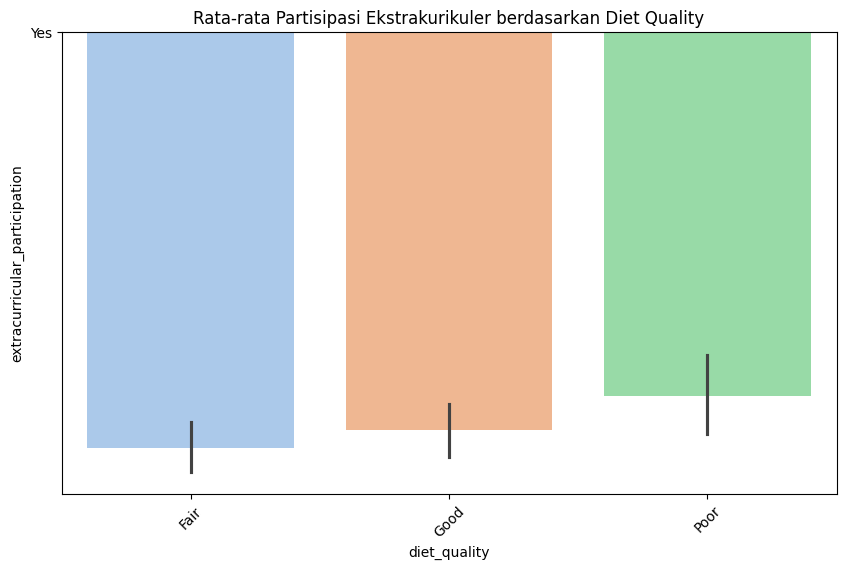

In [ ]:
# Cek hubungan antara diet_quality dengan extracurricular_participation
plt.figure(figsize=(10, 6))
sns.barplot(x=df['diet_quality'], y=df['extracurricular_participation'], palette="pastel")

plt.title("Rata-rata Partisipasi Ekstrakurikuler berdasarkan Diet Quality")
plt.xticks(rotation=45)
plt.show()

<ipython-input-348-298fc0b0b9a1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df['diet_quality'], y=df['exercise_frequency'], jitter=True, palette="pastel")


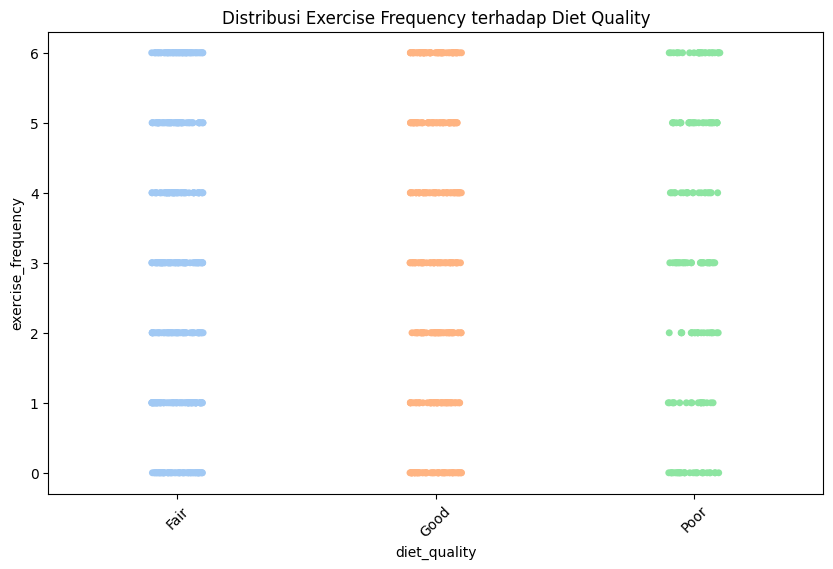

In [ ]:
# Cek hubungan antara diet quality dengan exercise frequency
plt.figure(figsize=(10, 6))
sns.stripplot(x=df['diet_quality'], y=df['exercise_frequency'], jitter=True, palette="pastel")

plt.title("Distribusi Exercise Frequency terhadap Diet Quality")
plt.xticks(rotation=45)
plt.show()

**Insight:**
Mahasiswa dengan pola makan Poor cenderung memiliki frekuensi olahraga tertinggi, sementara yang berada dalam kategori Fair lebih banyak berpartisipasi dalam ekstrakurikuler. Temuan ini menunjukkan bahwa aktivitas fisik dan keterlibatan sosial mungkin berfungsi sebagai mekanisme kompensasi yang berbeda bagi mahasiswa dalam menjaga kesejahteraan mereka. Mahasiswa dengan pola makan Poor tampaknya lebih memilih olahraga dibandingkan kegiatan sosial sebagai cara untuk mengelola tekanan akademik atau menjaga kebugaran, sementara mahasiswa dengan pola makan Fair cenderung lebih aktif dalam komunitas dan lingkungan sosial. Ketidakseimbangan ini juga bisa mengindikasikan bahwa mahasiswa dengan pola makan Poor memiliki keterbatasan dalam energi atau preferensi dalam mengalokasikan waktu mereka —misalnya, mereka mungkin tidak memiliki akses atau minat terhadap ekstrakurikuler tetapi tetap berusaha menjaga kondisi fisik mereka melalui olahraga. </br>
Selain itu, distribusi variabel exercise_frequency dalam scatterplot memperlihatkan bahwa hubungan antara pola makan dan aktivitas fisik tidak selalu linear, karena setiap kategori pola makan/diet menunjukkan tingkat variabilitas yang cukup tinggi dalam frekuensi olahraga. Dengan demikian, meskipun pola makan yang lebih baik sering dikaitkan dengan gaya hidup sehat, pola makan yang buruk tidak selalu berarti tingkat aktivitas fisik rendah—sebaliknya, mahasiswa dalam kategori tersebut mungkin lebih aktif secara fisik untuk mengkompensasi kebiasaan makan mereka. Untuk analisis lebih lanjut, hubungan antara aktivitas olahraga dan mental health rating bisa ditelusuri pada correlation matrix guna memahami apakah olahraga benar-benar membantu mahasiswa dengan pola makan buruk dalam mengatasi tekanan akademik dan psikologis mereka.


<ipython-input-349-b78a4b76dbd9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['diet_quality'], y=df['sleep_hours'], palette="pastel")


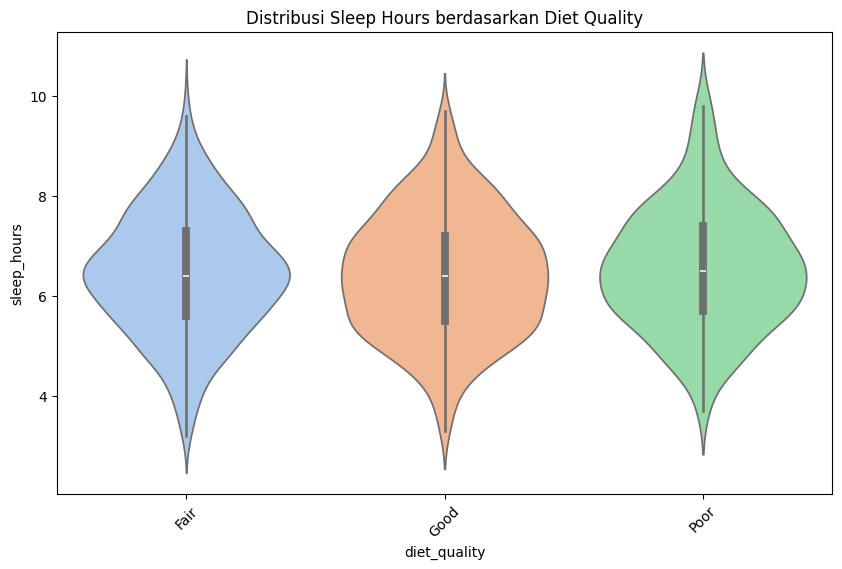

In [ ]:
# Cek distribusi data diet quality terhadap sleep hours
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['diet_quality'], y=df['sleep_hours'], palette="pastel")

plt.title("Distribusi Sleep Hours berdasarkan Diet Quality")
plt.xticks(rotation=45)
plt.show()

**Insight:** </br>
Analisis menggunakan violin plot menunjukkan bahwa mahasiswa dengan pola makan **Fair** memiliki pola tidur yang paling terpusat dan konsisten dibandingkan kategori **Poor** dan **Good**, yang memiliki distribusi lebih lebar. Mahasiswa dengan pola makan **Poor** menunjukkan variasi pola tidur yang lebih besar, mengindikasikan adanya kelompok yang mungkin mengalami gangguan tidur akibat ketidakseimbangan pola makan dan gaya hidup, sementara sebagian lainnya mungkin tidur lebih lama sebagai bentuk kompensasi. **Kategori Good, meskipun memiliki pola makan yang lebih optimal, tetap menunjukkan variasi dalam pola tidur**, yang bisa disebabkan oleh fleksibilitas dalam jadwal mereka atau faktor eksternal seperti tekanan akademik dan sosial. Meski rata-rata jam tidur di semua kategori berada di kisaran yang sama (6 jam-an), distribusi data memberikan gambaran lebih jelas bahwa pola makan tidak hanya berdampak pada kesehatan fisik, tetapi juga memengaruhi stabilitas rutinitas tidur mahasiswa.


<ipython-input-350-4f93b3da4d11>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['diet_quality'], y=df['study_hours_per_day'], palette="pastel")


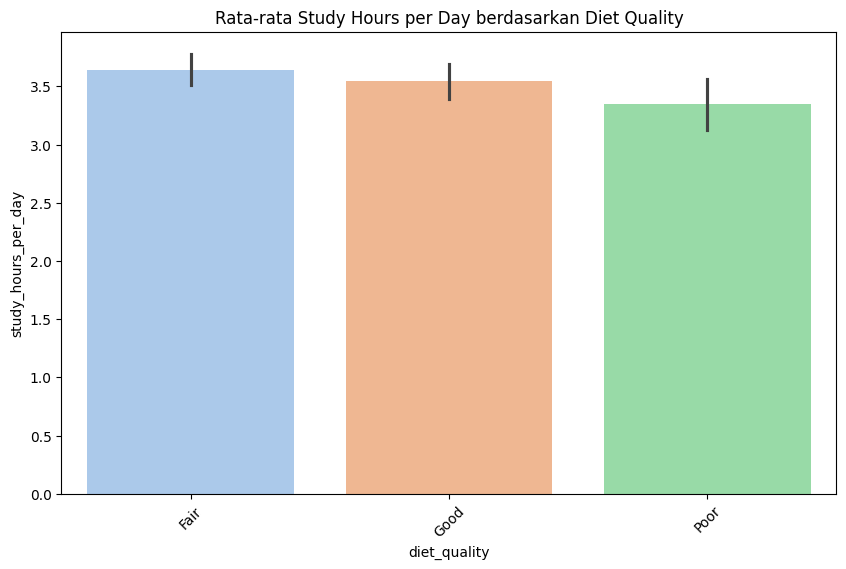

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['diet_quality'], y=df['study_hours_per_day'], palette="pastel")

plt.title("Rata-rata Study Hours per Day berdasarkan Diet Quality")
plt.xticks(rotation=45)
plt.show()

<ipython-input-351-82345f15e079>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['diet_quality'], y=df['study_hours_per_day'], palette="pastel")


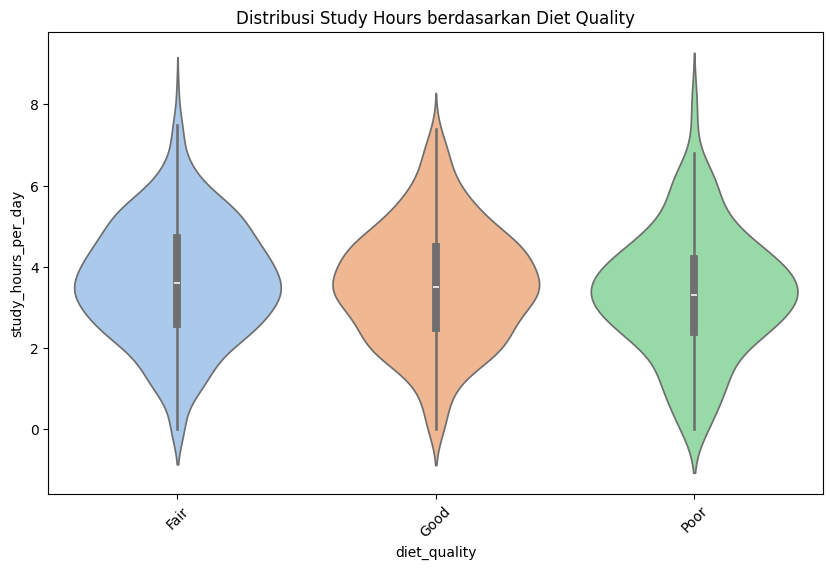

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['diet_quality'], y=df['study_hours_per_day'], palette="pastel")

plt.title("Distribusi Study Hours berdasarkan Diet Quality")
plt.xticks(rotation=45)
plt.show()

**Insight:** </br>
Mahasiswa dengan pola makan Poor memiliki variasi jam belajar yang paling luas, dengan perbedaan signifikan antara mereka yang belajar dalam waktu sangat sedikit dan mereka yang belajar sangat lama. Sebaliknya, kategori Fair dan Good memiliki distribusi yang lebih gendut memusat, menunjukkan bahwa mayoritas mahasiswa dalam kelompok ini memiliki rutinitas belajar yang lebih konsisten. Temuan ini mengindikasikan bahwa mahasiswa dengan pola makan Fair dan Good lebih terstruktur dalam alokasi waktu belajar mereka, sedangkan mahasiswa dengan pola makan Poor cenderung memiliki kebiasaan belajar yang lebih tidak teratur, mungkin akibat tekanan akademik, strategi manajemen waktu yang kurang efektif, atau faktor eksternal lainnya. Variasi yang besar dalam kategori Poor juga menunjukkan bahwa pola makan yang kurang sehat mungkin berkontribusi pada pola belajar yang tidak stabil, sehingga untuk memahami dampaknya terhadap performa akademik, analisis lebih lanjut mengenai hubungan antara study hours dan exam score perlu dilakukan dengan correlation matrix.


<ipython-input-352-4b92877d4cf1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['parental_education_level'], y=df['mental_health_rating'], palette="pastel")


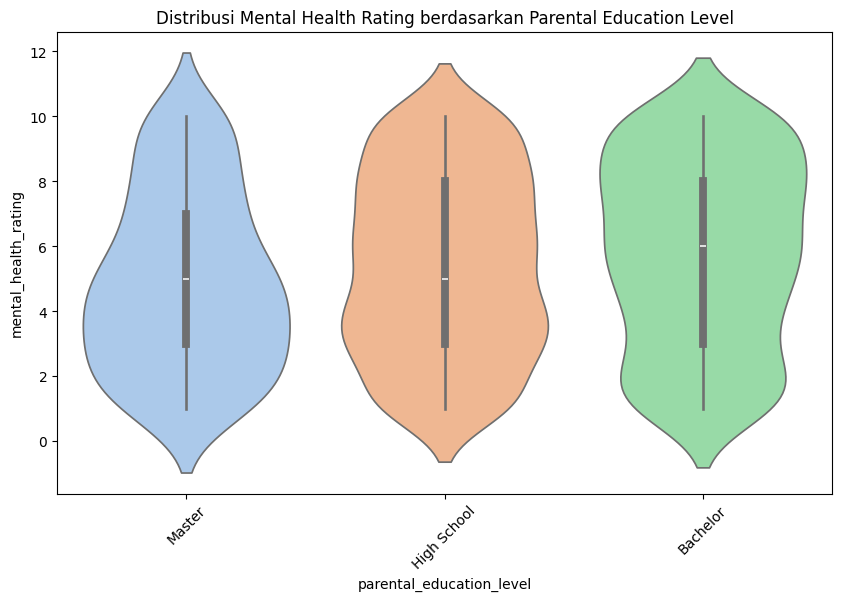

In [ ]:
# Cek hubungan antara parental education level dengan mental health rating
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['parental_education_level'], y=df['mental_health_rating'], palette="pastel")

plt.title("Distribusi Mental Health Rating berdasarkan Parental Education Level")
plt.xticks(rotation=45)
plt.show()

**Insight:** </br>
Mahasiswa dengan orang tua berpendidikan Master memiliki mental health rating terendah, yang menunjukkan bahwa mereka cenderung mengalami tekanan akademik lebih besar dibandingkan kelompok lain. Bisa jadi ini akibat ekspektasi tinggi dari orang tua, di mana mereka merasa harus mencapai standar akademik tertentu agar memenuhi harapan keluarga. Selain itu, kemungkinan adanya metode belajar yang lebih kaku dan terstruktur membuat mereka memiliki lebih sedikit ruang untuk eksplorasi dan kemandirian, sehingga tekanan belajar semakin terasa. Mahasiswa dalam kelompok ini mungkin juga menghadapi persaingan akademik yang lebih intens, karena mereka sering dibandingkan dengan teman-teman mereka atau dengan standar yang ditetapkan keluarga.


<ipython-input-353-206ffa0a3f49>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['parental_education_level'], y=df['study_hours_per_day'], palette="pastel")


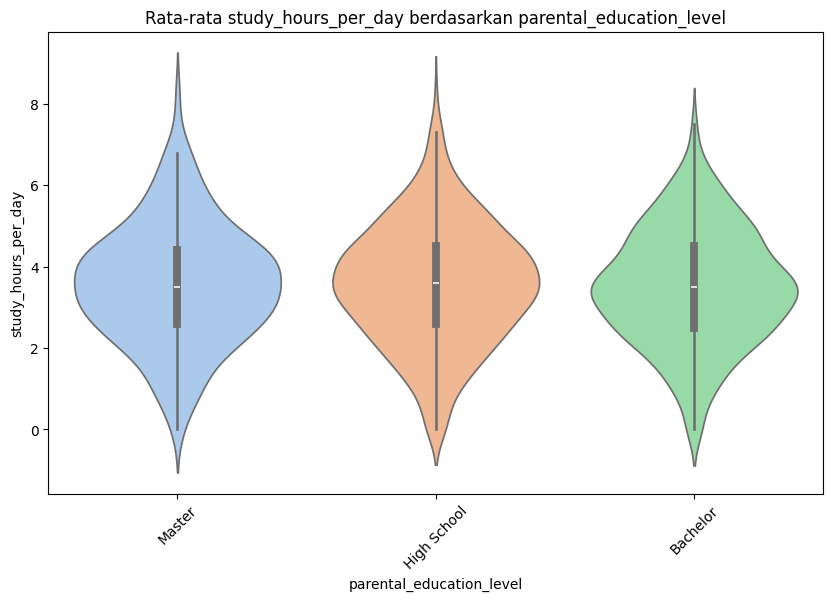

In [ ]:
# Cek hubungan antara parental education level dengan study hours per day
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['parental_education_level'], y=df['study_hours_per_day'], palette="pastel")

plt.title("Rata-rata study_hours_per_day berdasarkan parental_education_level")
plt.xticks(rotation=45)
plt.show()

<ipython-input-354-c2e19eec6481>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['parental_education_level'], y=df['sleep_hours'], palette="pastel")


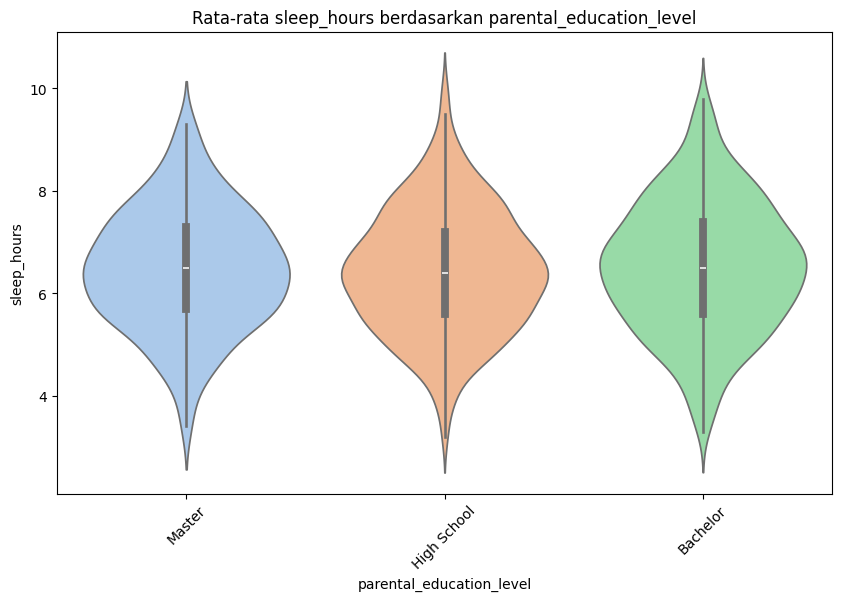

In [ ]:
# Cek hubungan antara parental education level dengan sleep hours
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['parental_education_level'], y=df['sleep_hours'], palette="pastel")

plt.title("Rata-rata sleep_hours berdasarkan parental_education_level")
plt.xticks(rotation=45)
plt.show()

**Insight:** </br>
Berdasarkan study hours per day dan sleep hours menunjukkan hasil bahwa tidak ada dampak signifikan untuk menyatakan bahwa parental education level memengaruhi pola belajar dan tidur mahasiswa seperti orang tua dengan pendidikan lebih tinggi memaksa anak mereka untuk belajar lebih lama atau memiliki kebiasaan tidur yang lebih terstruktur. Ini dibutikan dari bar plot bahwa latar belakang pendidikan orang tua apapun memiliki rata-rata study hour dan sleep hours yang cukup seragam yakni 3,5 jam dan 6 jam.

### Exploratory Data Analysis - Multivariate Analysis Fitur Numerik

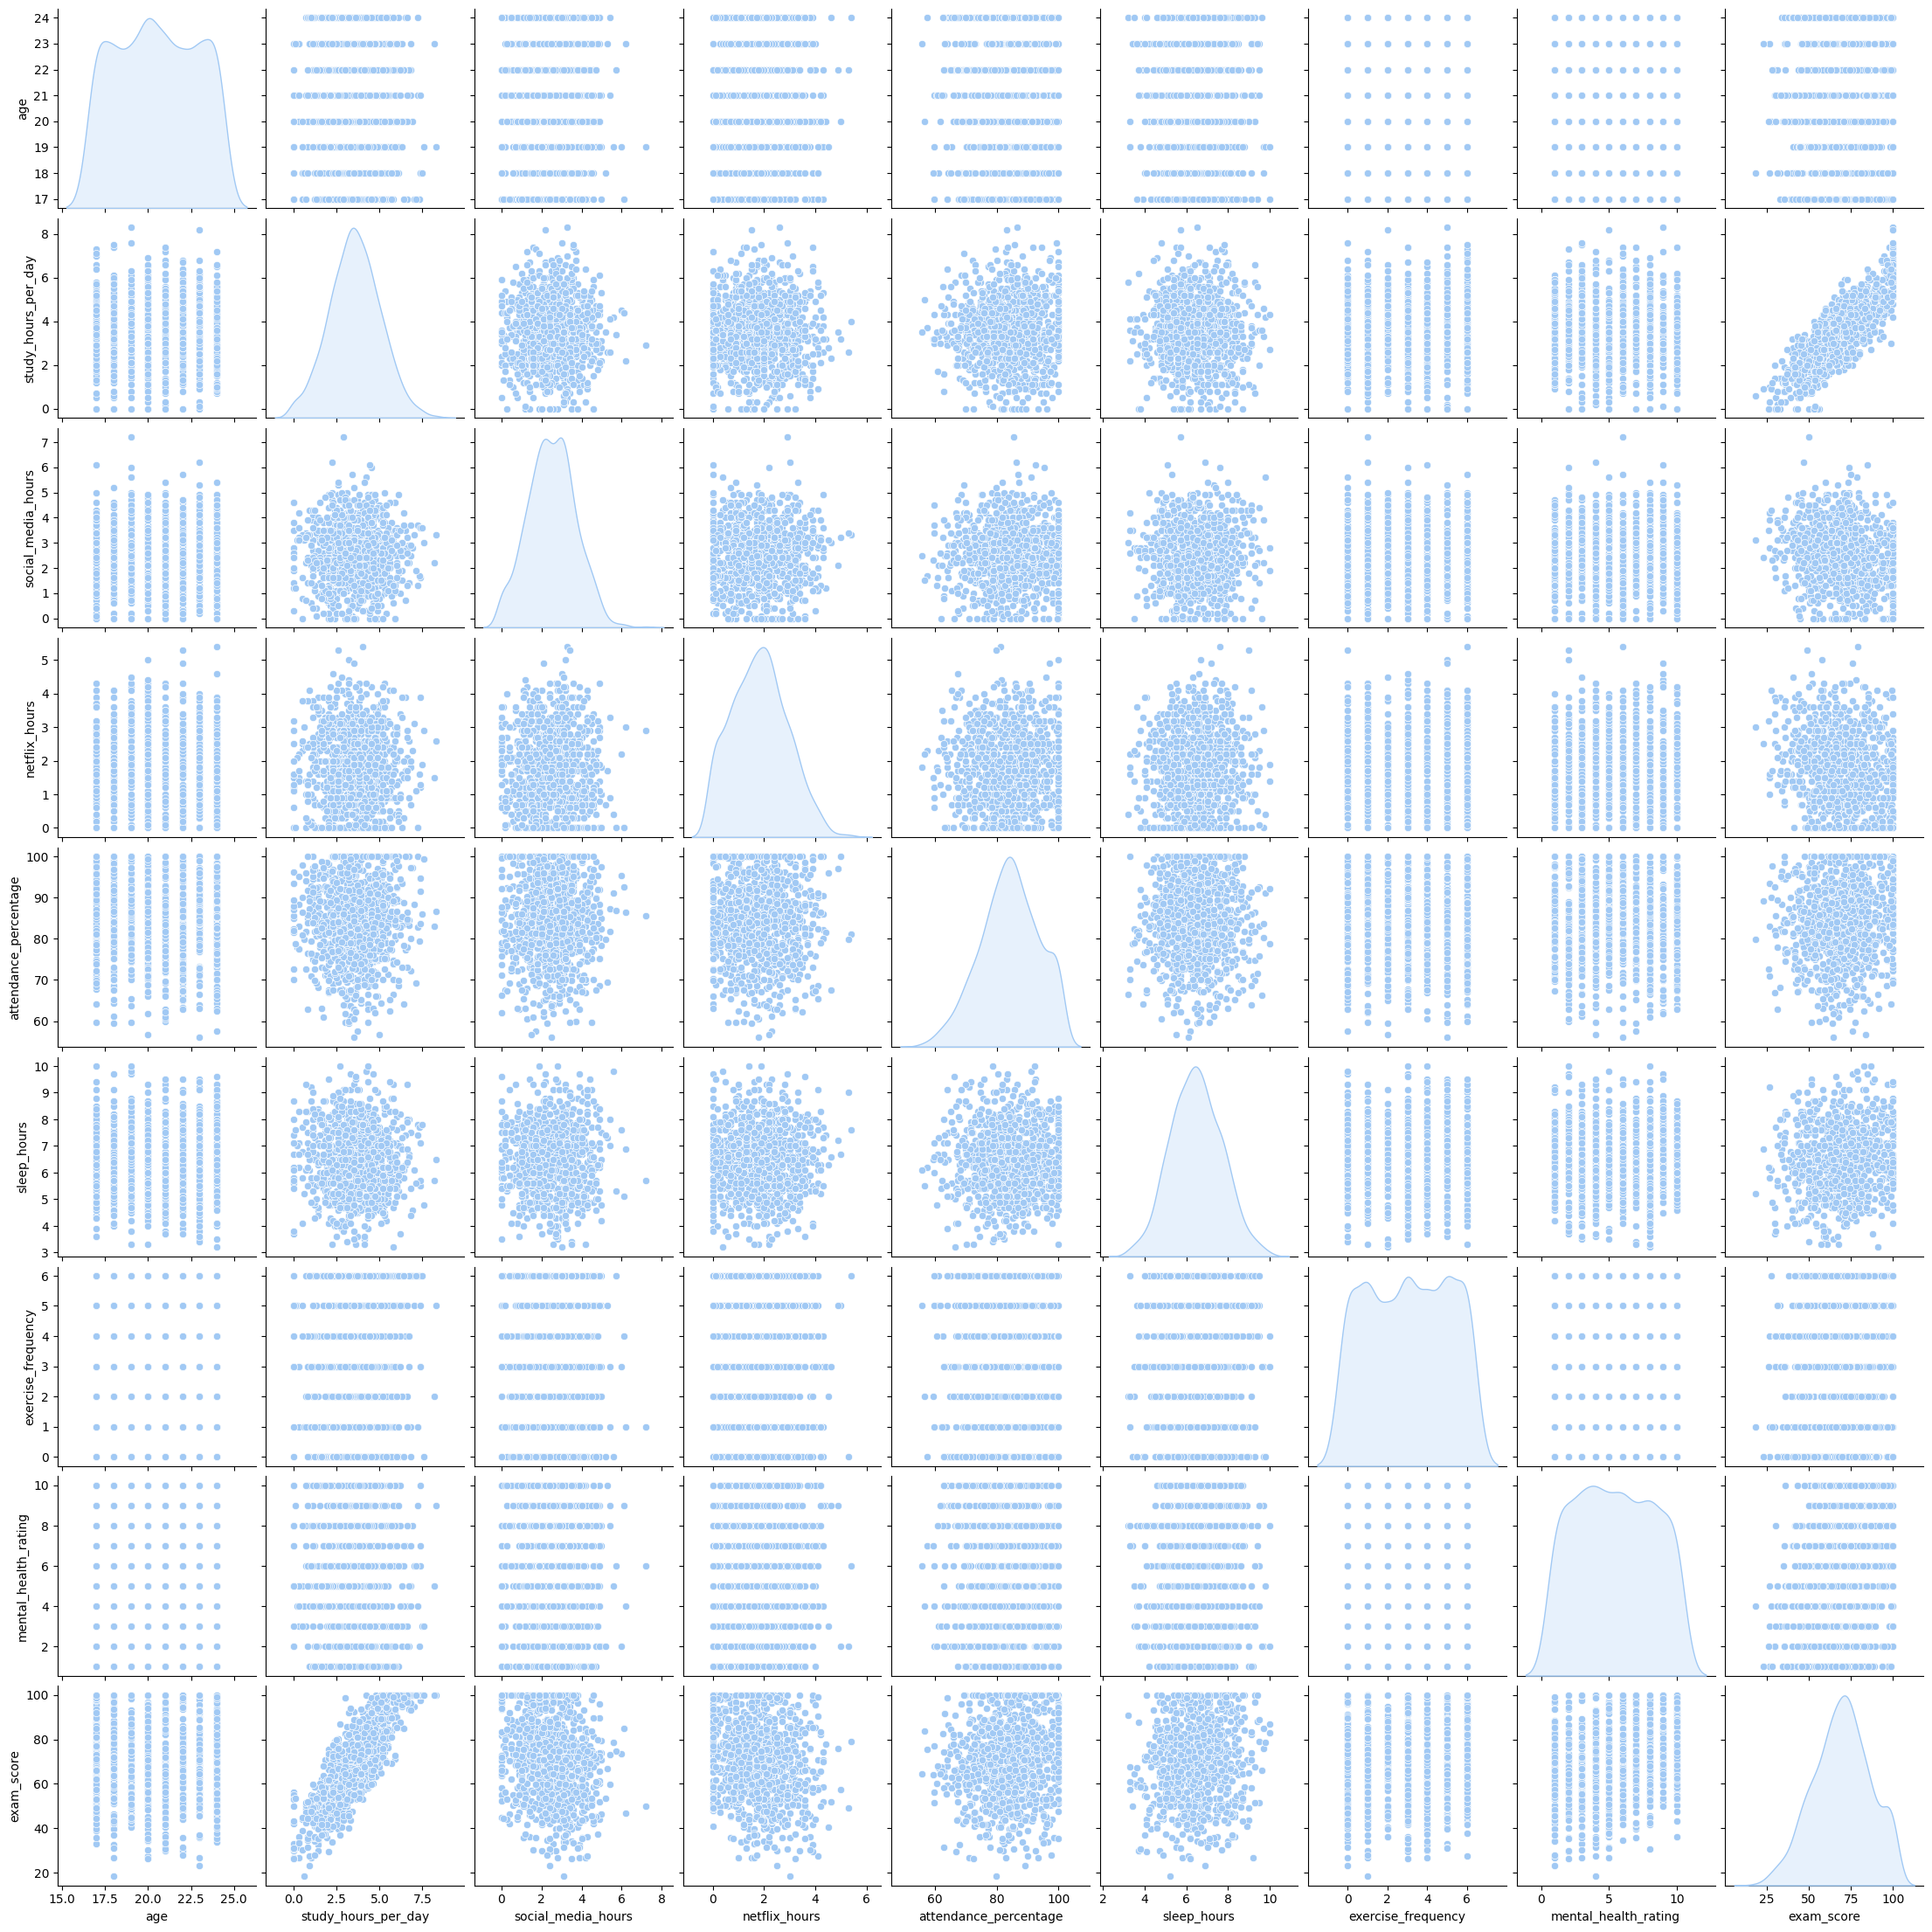

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot
sns.pairplot(df, diag_kind= 'kde')

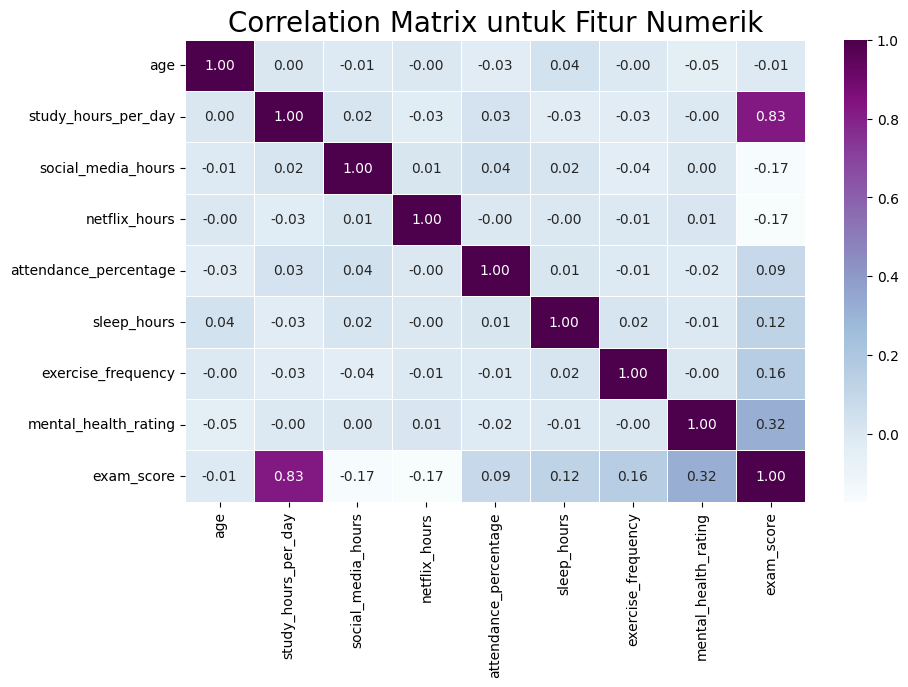

In [ ]:
# Menghitung correlation matrix
corr_matrix = df[numerical_columns].corr()

# Visualisasi heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="BuPu", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix untuk Fitur Numerik", size=20)
plt.show()

**Insights:**
1. **Study hours** memiliki korelasi **sangat kuat (0.83)** dengan **exam score**, menunjukkan bahwa semakin lama mahasiswa menghabiskan waktu untuk belajar, semakin tinggi nilai ujian yang mereka peroleh. Dengan hubungan yang hampir mendekati 1, variabel ini menjadi prediktor utama dalam menentukan performa akademik, mengindikasikan bahwa alokasi waktu belajar yang cukup dan efektif berkontribusi langsung terhadap pencapaian akademik yang lebih baik.  

2. **Sleep hours** memiliki korelasi **positif lemah (0.12)** dengan **exam score**, menunjukkan bahwa durasi tidur yang lebih lama memiliki sedikit hubungan dengan peningkatan performa akademik, tetapi tidak dalam skala yang signifikan. Meskipun pola tidur yang cukup bisa membantu dalam fokus dan pemulihan mental, data ini mengindikasikan bahwa jumlah jam tidur bukan faktor utama yang secara langsung menentukan keberhasilan ujian mahasiswa.  

3. **Exercise frequency** memiliki korelasi **positif lemah (0.16)** dengan **exam score**, yang menunjukkan bahwa frekuensi olahraga mungkin memiliki sedikit efek positif terhadap performa ujian, tetapi bukan faktor utama yang mendorong keberhasilan akademik. Bisa jadi aktivitas fisik membantu dalam keseimbangan mental dan fisik mahasiswa, meningkatkan daya tahan dan fokus belajar, tetapi kontribusinya tetap kecil dibandingkan dengan waktu yang dialokasikan untuk belajar secara langsung.  

4. **Mental health rating** memiliki korelasi **moderat (0.32)** dengan **exam score**, yang berarti bahwa semakin baik kesehatan mental mahasiswa, semakin besar kemungkinan mereka mendapatkan nilai ujian yang lebih tinggi. Ini mengindikasikan bahwa kesejahteraan psikologis memiliki peran yang lebih signifikan dibandingkan pola tidur atau frekuensi olahraga, di mana mahasiswa yang lebih sehat secara mental mungkin memiliki strategi coping yang lebih baik, manajemen stres yang lebih efektif, dan motivasi akademik yang lebih tinggi.

## **Data Preparation**

Terdapat sejumlah tahapan pada persiapan data, yakni:
1. Feature Selection
2. Encoding Fitur Kategori
3. Splitting Data untuk Modelling
4. Feature Scaling (Standardisasi)


1. Feature Selection


In [ ]:
def feature_selection(df, drop_cols):
    """Menghapus fitur yang tidak diperlukan dari dataset"""
    df_selected = df.drop(drop_cols, axis=1, errors='ignore')
    return df_selected

# Definisi kolom yang akan dihapus
drop_cols = ["student_id", "age", "attendance_percentage"]

# Proses feature selection
df_selected = feature_selection(df, drop_cols)

# Lihat hasil setelah feature selection
df_selected.head()

,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,Female,0.0,1.2,1.1,No,8.0,Fair,6,Master,Average,8,Yes,56.2
1,Female,6.9,2.8,2.3,No,4.6,Good,6,High School,Average,8,No,100.0
2,Male,1.4,3.1,1.3,No,8.0,Poor,1,High School,Poor,1,No,34.3
3,Female,1.0,3.9,1.0,No,9.2,Poor,4,Master,Good,1,Yes,26.8
4,Female,5.0,4.4,0.5,No,4.9,Fair,3,Master,Good,1,No,66.4


2. Encoding Fitur Kategori

In [ ]:
def encode_categorical_features(df):
    """Melakukan Label Encoding dan One-Hot Encoding pada fitur kategorikal"""
    df_encoded = df.copy()  # Salin dataset agar tidak merusak df_selected

    # Label Encoding untuk fitur dengan urutan logis
    label_cols = ["parental_education_level", "internet_quality"]
    encoder = LabelEncoder()
    for col in label_cols:
        df_encoded[col] = encoder.fit_transform(df_encoded[col])

    # One-Hot Encoding untuk fitur tanpa urutan
    one_hot_cols = ["gender", "part_time_job", "diet_quality", "extracurricular_participation"]
    df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=True)

    # Konversi fitur boolean ke numerik (0/1)
    bool_cols = df_encoded.select_dtypes(include=['bool']).columns
    df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

    return df_encoded

# Proses encoding
df_encoded = encode_categorical_features(df_selected)

# Lihat hasil setelah encoding
df_encoded.head()

,study_hours_per_day,social_media_hours,netflix_hours,sleep_hours,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,extracurricular_participation_Yes
0,0.0,1.2,1.1,8.0,6,2,0,8,56.2,0,0,0,0,0,1
1,6.9,2.8,2.3,4.6,6,1,0,8,100.0,0,0,0,1,0,0
2,1.4,3.1,1.3,8.0,1,1,2,1,34.3,1,0,0,0,1,0
3,1.0,3.9,1.0,9.2,4,2,1,1,26.8,0,0,0,0,1,1
4,5.0,4.4,0.5,4.9,3,2,1,1,66.4,0,0,0,0,0,0


3. Splitting Dataset

In [ ]:
def split_dataset(df, target_col, test_size=0.2, random_state=42):
    """Memisahkan dataset menjadi train dan test set"""
    X = df.drop(columns=[target_col])  # Semua fitur kecuali target
    y = df[target_col]  # Target yang ingin diprediksi

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

# Proses splitting dataset dengan variabel baru
target_col = "exam_score"
X_train, X_test, y_train, y_test = split_dataset(df_encoded, target_col)

# Cek ukuran dataset hasil split
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (800, 14), Test set: (200, 14)


4. Feature Scaling (Standardisasi)

In [ ]:
def standardize_features(X_train, X_test, numeric_cols):
    """Melakukan standardisasi pada fitur numerik"""
    scaler = StandardScaler()

    # Fit hanya pada data latih agar tidak ada kebocoran informasi ke data uji
    X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

    # Transform data uji menggunakan scaler yang sudah dilatih dari data latih
    X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

    return X_train, X_test

# Definisikan fitur numerik yang akan distandardisasi
numeric_cols = ["study_hours_per_day", "social_media_hours", "netflix_hours", "sleep_hours",
                "exercise_frequency", "mental_health_rating"]

# Proses standardisasi
X_train, X_test = standardize_features(X_train, X_test, numeric_cols)

# Cek hasil setelah scaling
print(X_train.head())
print(X_test.head())

     study_hours_per_day  social_media_hours  netflix_hours  sleep_hours  \
29             -1.049785            0.612601       1.813009     0.191900   
535             1.915186            1.469385      -0.293810    -0.297797   
695            -0.712857           -0.501219      -0.202209     0.436749   
557             0.163158            0.955315       2.271013     0.681598   
836            -0.038999            0.269887      -1.667822    -2.174971   

     exercise_frequency  parental_education_level  internet_quality  \
29             1.456276                         1                 2   
535           -1.524587                         1                 1   
695            0.462655                         0                 1   
557           -1.027777                         0                 2   
836            0.959465                         1                 2   

     mental_health_rating  gender_Male  gender_Other  part_time_job_Yes  \
29               1.592488            0   

## **Modelling**

1. Linear Regression

In [ ]:
# Inisialisasi model
LR = LinearRegression()

# Training model pada data latih
LR.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_LR = LR.predict(X_test)

# Evaluasi performa
mae_LR = mean_absolute_error(y_test, y_pred_LR)
mse_LR = mean_squared_error(y_test, y_pred_LR)
r2_LR = r2_score(y_test, y_pred_LR)

print(f"Mean Absolute Error (MAE): {mae_LR:.2f}")
print(f"Mean Squared Error (MSE): {mse_LR:.2f}")
print(f"R-squared (R²): {r2_LR:.2f}")

Mean Absolute Error (MAE): 4.36
Mean Squared Error (MSE): 28.30
R-squared (R²): 0.89


2. Random Forest Regressor

In [ ]:
# Inisialisasi model dengan parameter dasar
RF = RandomForestRegressor(n_estimators=100, random_state=42)

# Training model pada data latih
RF.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_RF = RF.predict(X_test)

# Evaluasi performa
mae_RF = mean_absolute_error(y_test, y_pred_RF)
mse_RF = mean_squared_error(y_test, y_pred_RF)
r2_RF = r2_score(y_test, y_pred_RF)

print(f"Mean Absolute Error (MAE): {mae_RF:.2f}")
print(f"Mean Squared Error (MSE): {mse_RF:.2f}")
print(f"R-squared (R²): {r2_RF:.2f}")

Mean Absolute Error (MAE): 4.99
Mean Squared Error (MSE): 38.35
R-squared (R²): 0.85


3. SVM Regressor (SVR)

In [ ]:
# Inisialisasi model dengan kernel RBF (cocok untuk data non-linear)
SVR_model = SVR(kernel="rbf", C=1.0, epsilon=0.1)

# Training model pada data latih
SVR_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_SVR = SVR_model.predict(X_test)

# Evaluasi performa
mae_SVR = mean_absolute_error(y_test, y_pred_SVR)
mse_SVR = mean_squared_error(y_test, y_pred_SVR)
r2_SVR = r2_score(y_test, y_pred_SVR)

print(f"Mean Absolute Error (MAE): {mae_SVR:.2f}")
print(f"Mean Squared Error (MSE): {mse_SVR:.2f}")
print(f"R-squared (R²): {r2_SVR:.2f}")

Mean Absolute Error (MAE): 5.43
Mean Squared Error (MSE): 50.07
R-squared (R²): 0.80


4. Gradient Boosting Regressor

In [ ]:
# Inisialisasi model dengan parameter dasar
GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Training model pada data latih
GBR.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_GBR = GBR.predict(X_test)

# Evaluasi performa
mae_GBR = mean_absolute_error(y_test, y_pred_GBR)
mse_GBR = mean_squared_error(y_test, y_pred_GBR)
r2_GBR = r2_score(y_test, y_pred_GBR)

print(f"Mean Absolute Error (MAE): {mae_GBR:.2f}")
print(f"Mean Squared Error (MSE): {mse_GBR:.2f}")
print(f"R-squared (R²): {r2_GBR:.2f}")

Mean Absolute Error (MAE): 4.77
Mean Squared Error (MSE): 32.67
R-squared (R²): 0.87


## **Evaluasi Model**

In [ ]:
# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_LR, mae_RF, mae_SVR, mae_GBR],
    'MSE': [mse_LR, mse_RF, mse_SVR, mse_GBR],
    'R²': [r2_LR, r2_RF, r2_SVR, r2_GBR]
}

# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=["Linear Regression", "Random Forest Regressor", "SVR", "Gradient Boosting Regressor"])
df_results.round(2)

,MAE,MSE,R²
Linear Regression,4.36,28.30,0.89
Random Forest Regressor,4.99,38.35,0.85
SVR,5.43,50.07,0.80
Gradient Boosting Regressor,4.77,32.67,0.87


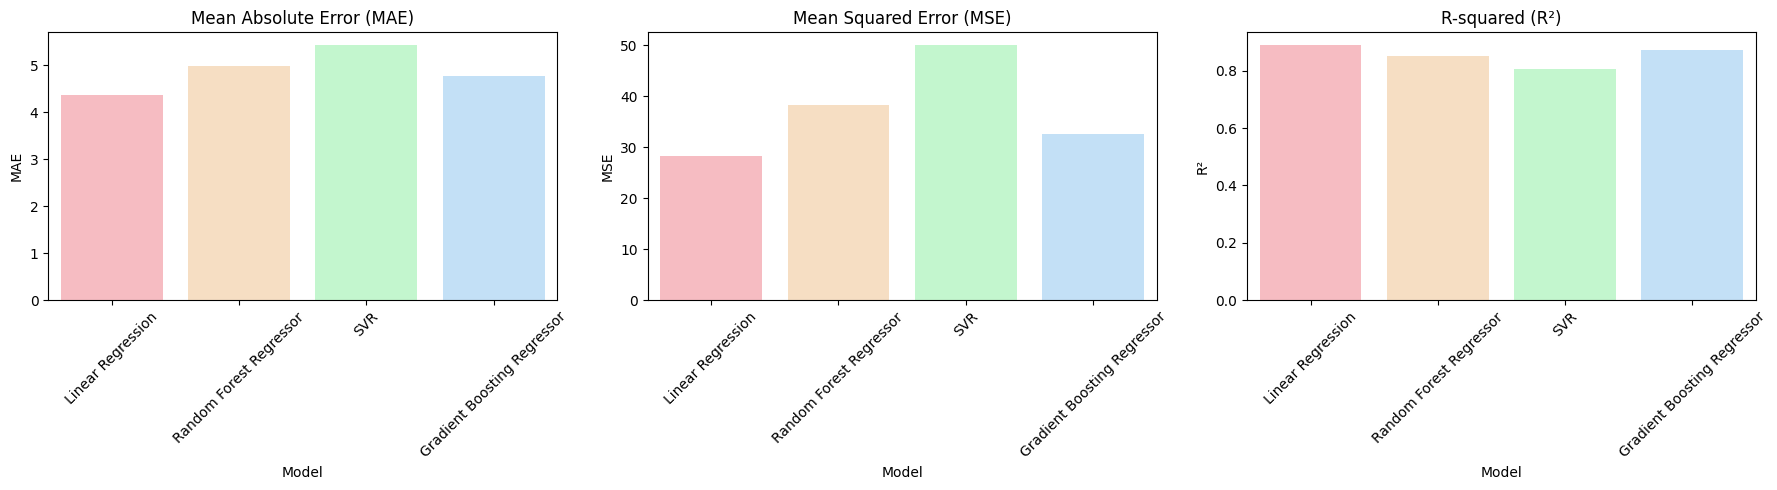

In [ ]:
# Warna pastel spesifik
colors = ["#ffb3ba", "#ffdfba", "#baffc9", "#bae1ff"]  # Pastel pink, orange, green, blue

# Buat DataFrame baru
df_plot = df_results.reset_index().rename(columns={'index': 'Model'})

# Membuat subplot untuk 3 metrik evaluasi
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# MAE
sns.barplot(x="Model", y="MAE", data=df_plot, ax=axes[0], hue="Model", palette=colors, legend=False)
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x', rotation=45)

# MSE
sns.barplot(x="Model", y="MSE", data=df_plot, ax=axes[1], hue="Model", palette=colors, legend=False)
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].set_ylabel('MSE')
axes[1].tick_params(axis='x', rotation=45)

# R² Score
sns.barplot(x="Model", y="R²", data=df_plot, ax=axes[2], hue="Model", palette=colors, legend=False)
axes[2].set_title('R-squared (R²)')
axes[2].set_ylabel('R²')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Insights:** </br>
Berdasarkan evaluasi terhadap Linear Regression, Random Forest Regressor, SVR, dan Gradient Boosting Regressor, model Linear Regression menunjukkan performa terbaik dengan R² = 0.89. Hal ini menandakan bahwa model mampu menjelaskan 89% variabilitas dalam target berdasarkan fitur yang digunakan.





Keunggulan Model Linear Regression
1. Kesalahan prediksi paling kecil
  - Mean Absolute Error (MAE) = 4.36, menunjukkan rata-rata selisih antara prediksi dan nilai aktual lebih rendah dibandingkan model lainnya.
2. Prediksi yang lebih stabil
  - Mean Squared Error (MSE) = 28.30, yang berarti variabilitas kesalahan relatif lebih kecil, menghasilkan prediksi yang lebih konsisten.
3. Kemampuan menjelaskan variabilitas data tertinggi
  - Dengan R² = 0.89, model ini menunjukkan efektivitas dalam menangkap pola yang ada dalam dataset.

Perbandingan dengan Model Lain </br>
Meskipun model ensemble seperti Gradient Boosting Regressor (R² = 0.87) dan Random Forest Regressor (R² = 0.85) diuji, model-model tersebut tidak memberikan peningkatan yang signifikan dibandingkan Linear Regression.

- Gradient Boosting Regressor memiliki performa mendekati Linear Regression, tetapi dengan nilai MAE dan MSE yang lebih tinggi, yang menunjukkan bahwa model masih mengalami sedikit overfitting.
- Random Forest Regressor memiliki performa lebih rendah dengan R² = 0.85, menandakan bahwa model kurang mampu menangkap pola yang lebih kompleks dibandingkan Linear Regression.
- SVR memiliki performa terendah dengan R² = 0.80, kemungkinan karena kesulitan dalam menangkap pola dalam data yang lebih kompleks.

Kesimpulan:

Model **Linear Regression** menunjukkan hasil terbaik dalam memprediksi hubungan antara kebiasaan belajar siswa dan performa akademik mereka.  

Dengan **R² sebesar 0.89**, model ini mampu menjelaskan **89% variasi nilai akademik** berdasarkan faktor kebiasaan belajar. Nilai **MAE dan MSE yang lebih rendah** menunjukkan bahwa prediksi model lebih akurat dan konsisten dibandingkan model lainnya.  

Model ini dapat digunakan untuk **mengevaluasi pola belajar siswa**, membantu dalam **pengembangan metode pembelajaran yang lebih efektif**, dan mendukung **pengambilan keputusan dalam pendidikan** untuk meningkatkan hasil akademik. Jika diperlukan peningkatan lebih lanjut, model ensemble atau teknik pemrosesan data tambahan bisa dieksplorasi. Namun, saat ini **Linear Regression sudah cukup baik dalam menjelaskan hubungan ini**.